In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [3]:
from tqdm import tqdm#진행상황 보여준다.

In [4]:
#한글폰트 런타임 다시 시작
plt.rc('font',family = 'NanumBarunGothic')

# 크롤링으로 데이터 수집

In [5]:
startDate='2023.03.17'
startDate.replace('.','')

'20230317'

In [6]:
list1=[1,2,3]
list1[1:3]

[2, 3]

In [7]:
!pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
from bs4 import BeautifulSoup

In [9]:
import urllib.request

In [10]:
def getTitle(keyWord,startDate,endDate,start):
  keyWord_encoding=urllib.parse.quote(keyWord)
  url=f'https://search.naver.com/search.naver?where=news&sm=tab_pge&query={keyWord_encoding}&sort=0&photo=0&field=0&pd=3&ds={startDate}&de={endDate}&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from{startDate.replace(".","")}to{endDate.replace(".","")},a:all&start={start}'
  print(url)
  html=urllib.request.urlopen(url)
  soup=BeautifulSoup(html,'html.parser')

  ul = soup.find('ul',attrs={'class':'list_news'})
  li_list=ul.find_all('li',attrs={'class':'bx'})
  title=[ li.find('a',attrs={'class':'news_tit'}).get_text() for li in li_list]#find 한 개의 태그 반환
  date=[ li.find_all('span',attrs={'class':'info'})[-1].get_text() for li in li_list] #find_all 무조건 리스트형식 반환
  # li_list = soup.select('div > div.group_news > ul.list_news > li') 
  # title=[ li.select('a.news_tit')[0].text for li in li_list] #select는 무조건 리스트형식으로 반환 #text,get_text()기능 같다.
  # date=[li.select('div.info_group>span.info')[-1].text for li in li_list]

  return [ {'title':t,'date':d} for t,d in zip(title,date)]

In [11]:
# result=[]
# keyWord=input("검색어:")
# startDate=input("시작 날짜 입력:")
# endDate=input("종료 날짜 입력:")
# pagenum=int(input('크롤링 페이지 수:'))
# for pagenum in tqdm(range(1,10*pagenum,10)):
#     result+=getTitle(keyWord,startDate,endDate,pagenum)

In [55]:
def searchKeyword():
  result=[]
  keyWord=input("검색어:")
  startDate=input("시작 날짜 입력:")
  endDate=input("종료 날짜 입력:")
  pagenum=int(input('크롤링 페이지 수:'))
  for pagenum in tqdm(range(1,10*pagenum,10)):
      result+=getTitle(keyWord,startDate,endDate,pagenum)  
  return pd.DataFrame(result)

In [56]:
df_sm=searchKeyword()

검색어:sm엔터
시작 날짜 입력:2023.03.01
종료 날짜 입력:2023.03.02
크롤링 페이지 수:3


  0%|          | 0/3 [00:00<?, ?it/s]

https://search.naver.com/search.naver?where=news&sm=tab_pge&query=sm%EC%97%94%ED%84%B0&sort=0&photo=0&field=0&pd=3&ds=2023.03.01&de=2023.03.02&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from20230301to20230302,a:all&start=1


 33%|███▎      | 1/3 [00:01<00:03,  1.67s/it]

https://search.naver.com/search.naver?where=news&sm=tab_pge&query=sm%EC%97%94%ED%84%B0&sort=0&photo=0&field=0&pd=3&ds=2023.03.01&de=2023.03.02&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from20230301to20230302,a:all&start=11


 67%|██████▋   | 2/3 [00:03<00:01,  1.52s/it]

https://search.naver.com/search.naver?where=news&sm=tab_pge&query=sm%EC%97%94%ED%84%B0&sort=0&photo=0&field=0&pd=3&ds=2023.03.01&de=2023.03.02&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from20230301to20230302,a:all&start=21


100%|██████████| 3/3 [00:04<00:00,  1.53s/it]


In [57]:
df_sm

,title,date
0,"조현준 회장의 효성 계열사, SM엔터 지분 하이브에 매각",2023.03.02.
1,주총 의결권 확보 전쟁…SM엔터 주주서한 발송,2023.03.01.
2,이복현 금감원장 “SM엔터 시세조종 의혹 무관용으로 엄단”,2023.03.02.
3,이래도 저래도…SM 쩐의 전쟁?,2023.03.02.
4,"금감원 ""SM엔터 공개매수 기간 내 대량매집 엄정 대응""",2023.03.01.
5,"하이브, 'SM 공개매수' 실패… 31일 주총에 운명 건다",2023.03.02.
6,분쟁 대응에 곳간 축난 SM엔터…재계약 앞둔 아티스트 이탈 우려도,2023.03.01.
7,"SM엔터 시세조정 의혹에 금감원 ""조사 후 엄정대응""",2023.03.01.
8,"IPO 앞둔 카카오엔터, 글로벌 K팝 대어 ’SM’ 군침",2023.03.02.
9,"금감원장, SM엔터 시세조종 의혹에 ""무관용으로 책임 묻겠다""",2023.03.02.


In [58]:
df_sm.date.unique()

array(['2023.03.02.', '2023.03.01.'], dtype=object)

In [59]:
sorted(df_sm.date.unique())

['2023.03.01.', '2023.03.02.']

# 워드클라우드 만들기

In [33]:
import nltk
nltk.download('punkt')
nltk.download('webtext')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

nltk.download('gutenberg')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package webtext to /root/nltk_data...
[nltk_data]   Unzipping corpora/webtext.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


True

In [22]:
!pip install konlpy 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 63.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 KB 36.0 MB/s eta 0:00:00


In [23]:
import konlpy
from konlpy.tag import Okt
import re
from functools import reduce
from collections import Counter #데이터 집합에서 개수를 자동으로 계산

In [24]:
t=Okt()

In [64]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

In [94]:
sm_token=[]
for text in df_sm.title:
    tokenizer=RegexpTokenizer("[\w]{2,}")
    reg_tokens=tokenizer.tokenize(text)
    sm_token.append(reg_tokens)
sm_token

[['조현준', '회장의', '효성', '계열사', 'SM엔터', '지분', '하이브에', '매각'],
 ['주총', '의결권', '확보', '전쟁', 'SM엔터', '주주서한', '발송'],
 ['이복현', '금감원장', 'SM엔터', '시세조종', '의혹', '무관용으로', '엄단'],
 ['이래도', '저래도', 'SM', '쩐의', '전쟁'],
 ['금감원', 'SM엔터', '공개매수', '기간', '대량매집', '엄정', '대응'],
 ['하이브', 'SM', '공개매수', '실패', '31일', '주총에', '운명', '건다'],
 ['분쟁', '대응에', '곳간', '축난', 'SM엔터', '재계약', '앞둔', '아티스트', '이탈', '우려도'],
 ['SM엔터', '시세조정', '의혹에', '금감원', '조사', '엄정대응'],
 ['IPO', '앞둔', '카카오엔터', '글로벌', 'K팝', '대어', 'SM', '군침'],
 ['금감원장', 'SM엔터', '시세조종', '의혹에', '무관용으로', '책임', '묻겠다'],
 ['SM엔터', '분쟁', '공식행사', '에스파', '콘서트', '의미심장한', '장면'],
 ['SM엔터', '쟁탈전', '원아시아파트너스의', '정체는'],
 ['SM엔터', '경영권', '놓고', '물밑', '불법견제', '있었나', '감독당국', '조사'],
 ['특징주', '카카오', '등판', '기대', '업었나', 'SM', '장중', '13만', '넘어'],
 ['지난달', '국내증시', '거래대금', '1위는', '삼성전자', 'SM은', '4위'],
 ['SM', '인수했는데', '에스파만', '남았다', '대형기획사', '러브콜', '받는', '스타들'],
 ['이복현', '금감원장', 'SM', '주가', '조종', '의혹', '위법', '있다면', '용납', '못해'],
 ['SM엔터', '쟁탈전', '헬리오스제1호', '말고', '있다'],
 ['SM', '인수전', '2막의', '향배', '

In [95]:
# sm_noun2=[]
# for text in df_sm.title:
#     message=re.sub(r"[^A-Za-zㄱ-ㅎ가-힣]+"," ",text)
#     message_n=t.nouns(message)
#     sm_noun2.append(message_n)
# sm_noun2

In [96]:
sm_stopwords=['SM엔터','SM','SM엔터테인먼트']
sm_token=reduce(lambda x,y:x+y,sm_token)
sm_token=[token for token in sm_token if token not in sm_stopwords]
sm_token_count=Counter(sm_token)


In [97]:
sm_token_count_30=sm_token_count.most_common(30)
sm_token_count_30_df=pd.DataFrame(sm_token_count_30,columns=['단어','단어수'])
sm_token_count_30_df.head()

,단어,단어수
0,분쟁,6
1,금감원장,4
2,공개매수,4
3,이복현,3
4,의혹,3


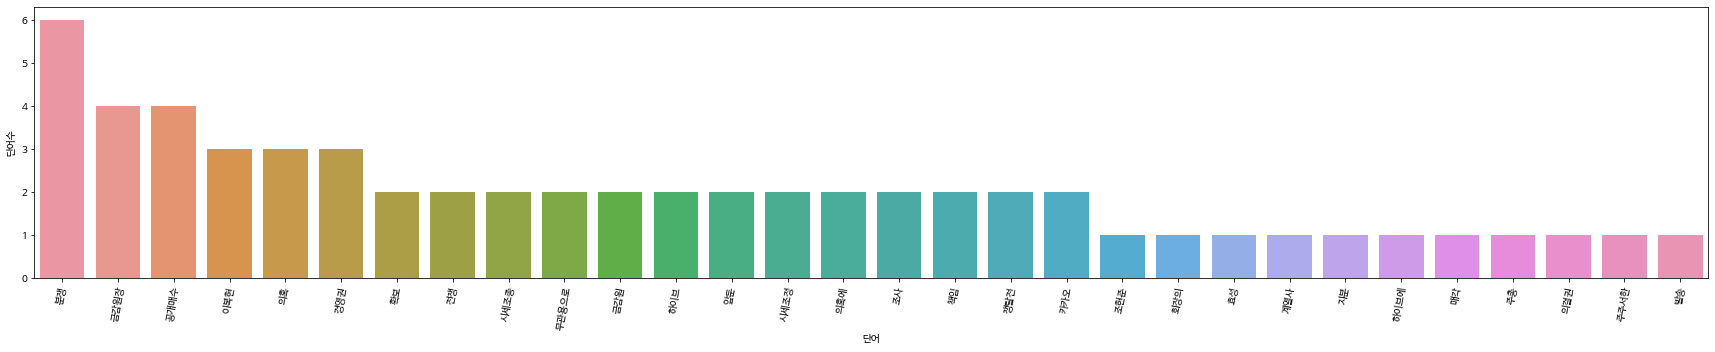

In [98]:
plt.figure(figsize=(30,5))
sns.barplot(data=sm_token_count_30_df,x='단어',y='단어수')
plt.xticks(rotation=80)
plt.show()

In [102]:
from wordcloud import WordCloud
from PIL import Image

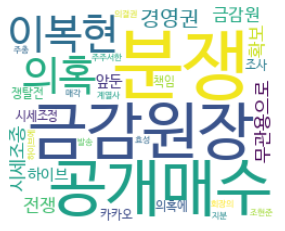

In [122]:
cloud_mask=np.array(Image.open('/content/sample_data/cloudimage.png'))


sm_2022_token_count_30_dic=dict(sm_token_count_30)

wc=WordCloud(
    background_color='white',
    width=1000,height=600,
    font_path='NanumBarunGothic',
    mask=cloud_mask
    )
cloud=wc.generate_from_frequencies(sm_2022_token_count_30_dic)
plt.imshow(cloud,interpolation='bilinear')
plt.axis('off')
plt.show()